In [10]:
suppressMessages(source("../config_sing.R"))

You are in singularity_proj_encode_fcc 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_encode_fcc 


In [11]:
dir(FD_RES)

[1] "KS91_K562_ASTARRseq"  "log"                  "source"              
[4] "Tewhey_K562_TileMPRA"

In [12]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
dir(fdiry)

[1] "Tile_K562_20210130.GATA1.unstranded.bed"

In [13]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_20210130.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

cnames = c("chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

dat_mpra = read_tsv(fpath, col_names = cnames)
head(dat_mpra)

Rows: 52312 Columns: 12
── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, ID, Score, Strand
dbl (8): Start, End, log2fc, Input_Count, Output_Count, log10pval, log10fdr,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406


In [25]:
dat = dat_mpra
dat = dat %>% mutate(Loc = (Start + End) / 2)

n_rows = nrow(dat)
n_pick = 2

idx = rep(1:n_pick, n_rows / n_pick + 1)
idx = idx[1:n_rows]
idx = (idx == 1)

dat = dat[idx,]
head(dat)

chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.7868,10474.8687,112.11265262,110.93113079,0.10214790,47786500
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.6255,1788.2361,0.84506966,0.62872262,0.08785968,47786600
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.9163,2202.3845,0.30958996,0.21047015,0.09667741,47786700
chrX,47786701,47786900,X:47786701-47786900,.,+,-0.14075229,1203.4858,1091.8438,0.82510834,0.61223799,0.09767719,47786800
chrX,47786801,47787000,X:47786801-47787000,.,+,0.03915234,579.5989,594.3306,0.09901775,0.06322522,0.15154009,47786900
chrX,47786901,47787100,X:47786901-47787100,.,+,-0.05988051,1491.4411,1432.4449,0.26115626,0.17521033,0.09969449,47787000


In [67]:
dat = dat_mpra
dat = dat %>% mutate(Loc = (Start + End) / 2)

gpt = ggplot(dat, aes(x=Loc, y=exp(log2fc))) + 
    geom_line(size=0.05) + 
    geom_point(size=0.1) + 
    theme_cowplot()

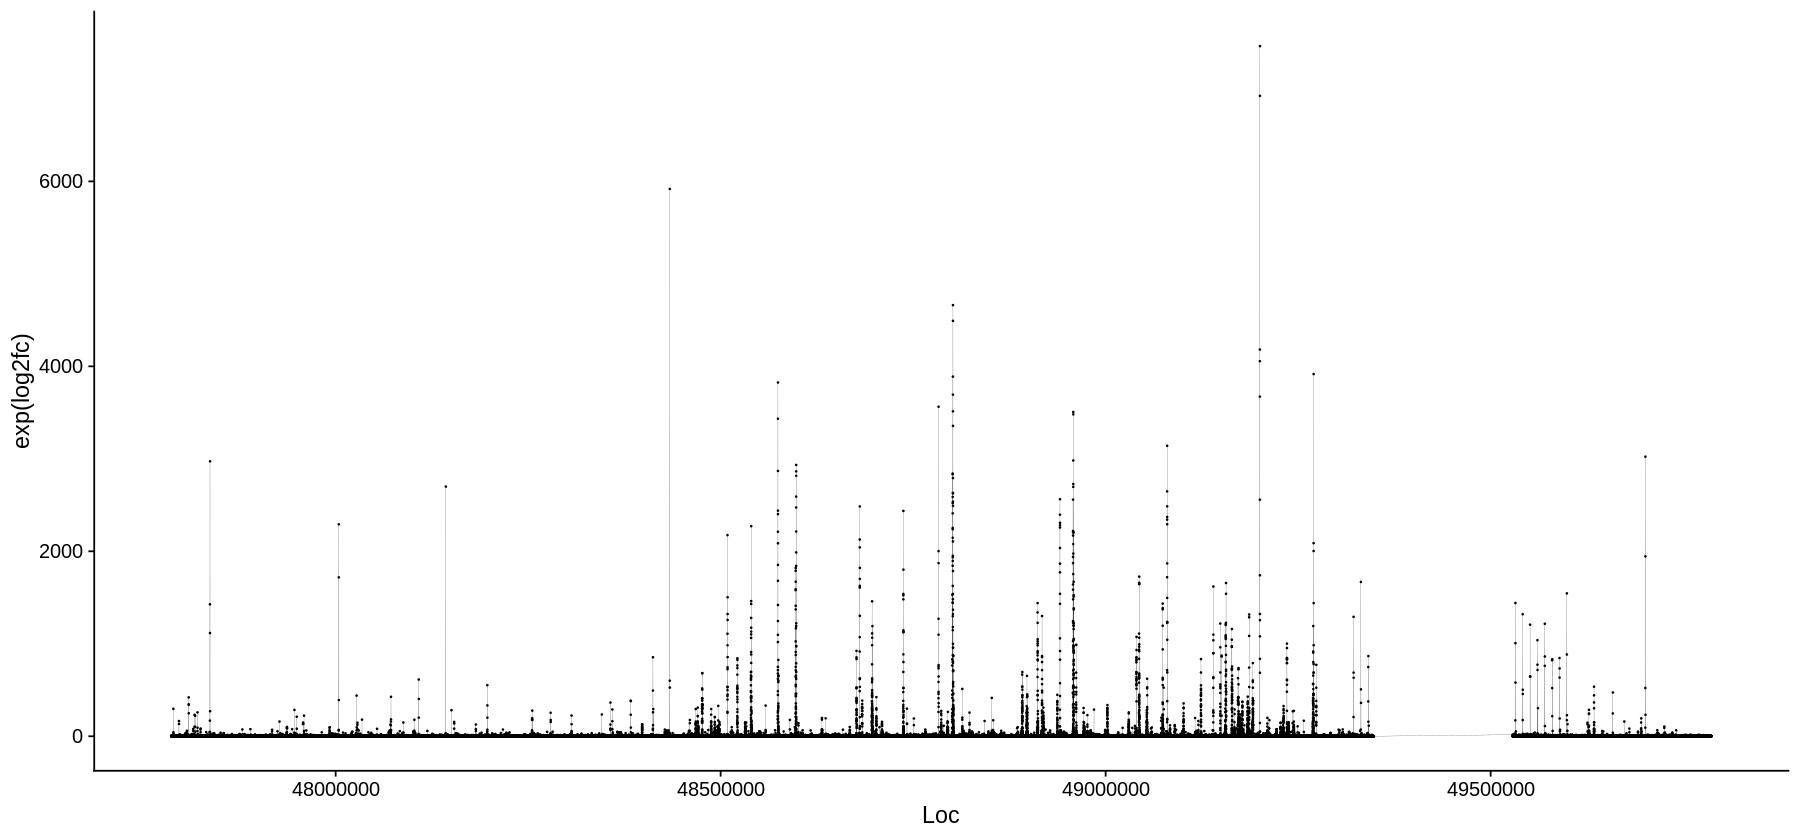

In [68]:
options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

Warning message:
“Removed 52267 rows containing missing values (geom_point).”


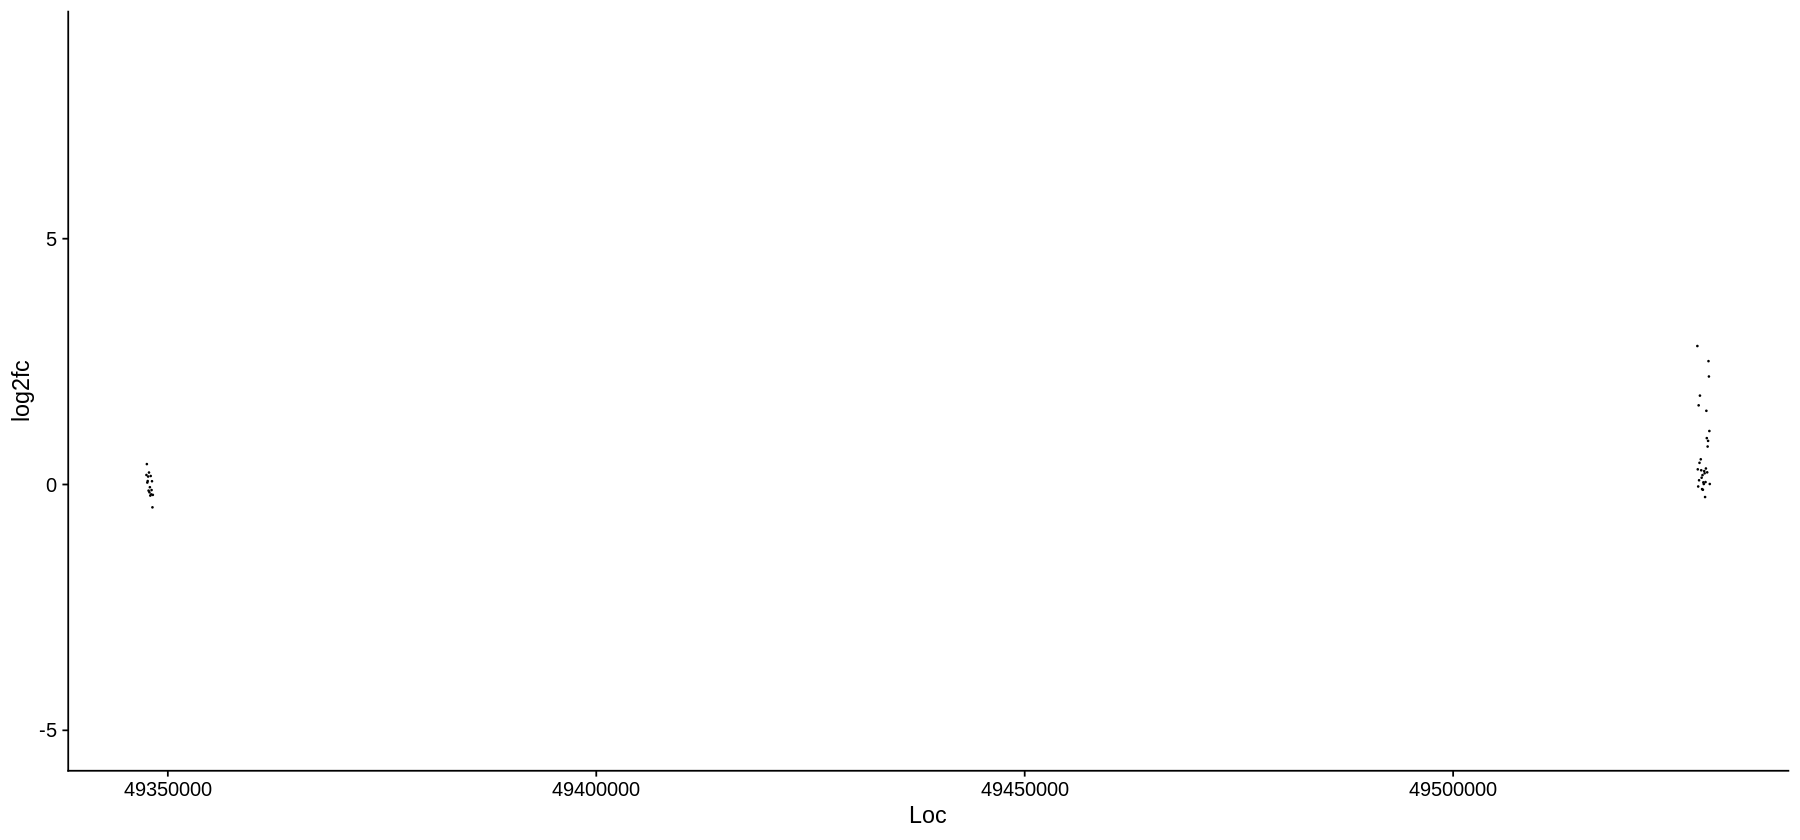

In [76]:
dat = dat_mpra
dat = dat %>% mutate(Loc = (Start + End) / 2)

gpt = ggplot(dat, aes(x=Loc, y=log2fc)) + 
    geom_point(size=0.1) + 
    theme_cowplot() + xlim(49347500, 49530000)

options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

In [70]:
dat = dat_mpra
dat = dat %>% mutate(Loc = (Start + End) / 2)

tmp = dat %>% dplyr::filter(Loc > 49348000, Loc < 49529000)
tmp

chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,49347901,49348100,X:49347901-49348100,.,+,0.17348955,526.301527,593.75739,0.6203219,0.44736379,0.14755987,49348000
chrX,49347951,49348150,X:49347951-49348150,.,+,-0.20054161,1249.345825,1086.52900,1.1724797,0.90239496,0.10957494,49348050
chrX,49348001,49348200,X:49348001-49348200,.,+,-0.11281952,734.304457,678.58691,0.4752572,0.33419425,0.11696520,49348100
chrX,49348051,49348250,X:49348051-49348250,.,+,0.06709130,182.509987,190.76572,0.1063843,0.06826882,0.24330082,49348150
chrX,49348101,49348300,X:49348101-49348300,.,+,-0.46426447,313.035046,227.91510,1.7335314,1.39304615,0.19705144,49348200
chrX,49348151,49348350,X:49348151-49348350,.,+,-0.21095647,759.159440,656.75031,0.8682440,0.64797845,0.14129907,49348250
chrX,49528401,49528600,X:49528401-49528600,.,+,2.81710500,1818.297455,12817.03270,257.9596924,256.49177083,0.08199446,49528500
chrX,49528451,49528650,X:49528451-49528650,.,+,0.30911606,1396.458849,1728.26079,2.3367590,1.94036228,0.10909601,49528550
chrX,49528501,49528700,X:49528501-49528700,.,+,-0.04017608,1648.705298,1603.55793,0.1874573,0.12305565,0.08838985,49528600


jump from `49,348,151` to `49,528,401`

## Check the original data

In [74]:
fdiry = file.path(FD_RES, "source", "mpra")
fname = "GATA-MYC_Tile_K562_K562_20210130.hg38.bed"
fpath = file.path(fdiry, fname)

cnames = c("chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

dat = read_tsv(fpath)
colnames(dat) = cnames
dat = dat %>% mutate(Loc = (Start + End) / 2)

dat_mpra_ori = dat
head(dat_mpra_ori)

Rows: 99875 Columns: 12
── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chr, id, score, strand
dbl (8): start, stop, log2fc, input-count, output-count, log10pval, log10fdr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,1:10437778:C:T:R:wC,.,+,2.3864209,883.0929,4616.0826,106.7371382,105.5726804,0.10837262,NA
1,NA,NA,1:10451799:C:T:R:wC,.,+,0.1632697,404.4490,452.6180,0.6953862,0.5069747,0.12786974,NA
1,NA,NA,1:110198727:C:G:R:wC,.,+,6.8942454,310.5452,36945.0097,Inf,Inf,0.10442677,NA
1,NA,NA,1:110881742:NA:NA,.,+,5.2284849,616.3812,23111.0120,Inf,Inf,0.09590843,NA
1,NA,NA,1:111838694:C:T:R:wC,.,+,6.3593775,322.7433,26498.6023,Inf,Inf,0.08644483,NA
1,NA,NA,1:113047064:NA:NA,.,+,0.1146690,915.5454,990.3427,0.5316370,0.3776899,0.10927472,NA


In [75]:
dat = dat_mpra_ori
dat = dat %>% dplyr::filter(Loc > 49348000, Loc < 49529000)
dat

chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,49347901,49348100,X:49347901-49348100,.,+,0.17348955,526.301527,593.75739,0.6203219,0.44736379,0.14755987,49348000
X,49347951,49348150,X:49347951-49348150,.,+,-0.20054161,1249.345825,1086.52900,1.1724797,0.90239496,0.10957494,49348050
X,49348001,49348200,X:49348001-49348200,.,+,-0.11281952,734.304457,678.58691,0.4752572,0.33419425,0.11696520,49348100
X,49348051,49348250,X:49348051-49348250,.,+,0.06709130,182.509987,190.76572,0.1063843,0.06826882,0.24330082,49348150
X,49348101,49348300,X:49348101-49348300,.,+,-0.46426447,313.035046,227.91510,1.7335314,1.39304615,0.19705144,49348200
X,49348151,49348350,X:49348151-49348350,.,+,-0.21095647,759.159440,656.75031,0.8682440,0.64797845,0.14129907,49348250
X,49528401,49528600,X:49528401-49528600,.,+,2.81710500,1818.297455,12817.03270,257.9596924,256.49177083,0.08199446,49528500
X,49528451,49528650,X:49528451-49528650,.,+,0.30911606,1396.458849,1728.26079,2.3367590,1.94036228,0.10909601,49528550
X,49528501,49528700,X:49528501-49528700,.,+,-0.04017608,1648.705298,1603.55793,0.1874573,0.12305565,0.08838985,49528600
